In [7]:
from __future__ import annotations
from typing import Any 

import json
import matplotlib.pyplot as plt
import pandas as pd

from premise_selection.evaluate import EvalResult, EvalData

In [8]:

PATHS = {
    #"No Coq": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq",
    #"No Coq CrossEnt": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq-crossent",
    "Select Model": "/home/kthompson/coq-modeling/premise-eval/prem-select",
    "Select Model Opt": "/home/kthompson/coq-modeling/premise-eval/prem-select-opt",
    "Rerank Model": "/home/kthompson/coq-modeling/premise-eval/rerank-pos-opt",
    "Rerank Model Select Opt": "/home/kthompson/coq-modeling/premise-eval/rerank-opt-select",
    "TF IDF": "/home/kthompson/coq-modeling/premise-eval/tf-idf",
    "BM25": "/home/kthompson/coq-modeling/premise-eval/bm25",
    #"Hard Premises": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq-crossent-pos",
    #"Lemma Premises": "/home/kthompson/coq-modeling/premise-eval/prem-select-lemma",
}

ATS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#ATS = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
#ATS = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
names: list[str] = []
recalls_list: list[list[float]] = []
for name, path in PATHS.items():
    with open(path, "r") as fin:
        eval_json_data = json.load(fin)
    eval_data = EvalData.from_json(eval_json_data)
    recalls: list[float] = []
    for k in ATS:
        recall_at_k = eval_data.recall_at(k)
        recalls.append(recall_at_k) 
    names.append(name)
    recalls_list.append(recalls)
    

Text(0.5, 1.0, 'Comparison of Premise Selection Methods')

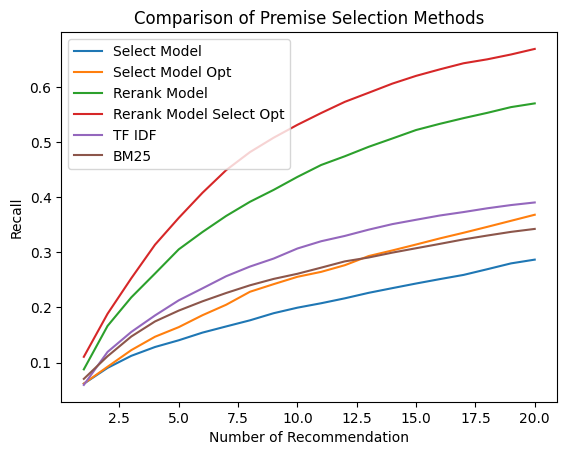

In [9]:
fig, ax = plt.subplots()
for name, recalls in zip(names, recalls_list):
    ax.plot(ATS, recalls, label=name)
ax.set_xlabel("Number of Recommendation")
ax.set_ylabel("Recall")
ax.legend()
ax.set_title("Comparison of Premise Selection Methods")



In [14]:
for name, recall_list in zip(names, recalls_list):
    for at, recall in zip(ATS, recall_list):
        print(f"{name} top {at}: {recall}")
    print()

Select Model top 1: 0.06158978114067204
Select Model top 2: 0.09030998291432756
Select Model top 3: 0.11219591571068262
Select Model top 4: 0.12822390366935155
Select Model top 5: 0.14042795541453096
Select Model top 6: 0.15434057440403548
Select Model top 7: 0.16556830200960052
Select Model top 8: 0.17663330892522985
Select Model top 9: 0.18956960377512
Select Model top 10: 0.19957692620616713
Select Model top 11: 0.20763160035798553
Select Model top 12: 0.21658123830445042
Select Model top 13: 0.22650720039052966
Select Model top 14: 0.23505003661215523
Select Model top 15: 0.24343015214384509
Select Model top 16: 0.2514034659506956
Select Model top 17: 0.25905133837767474
Select Model top 18: 0.26938410218859327
Select Model top 19: 0.27996094703441543
Select Model top 20: 0.28679521601171587

Select Model Opt top 1: 0.06183386217557563
Select Model Opt top 2: 0.09234399153852413
Select Model Opt top 3: 0.12252867952160117
Select Model Opt top 4: 0.1468554226669921
Select Model Opt 

In [11]:
precisions: list[float] = []
recalls: list[float] = []
for k in ATS:
    precisions.append(eval_data.precision_at(k))
    recalls.append(eval_data.recall_at(k))

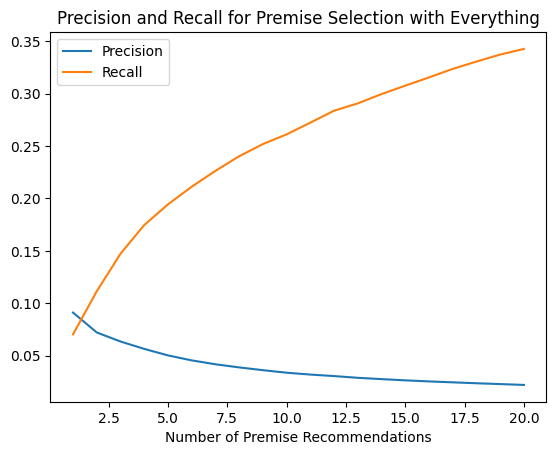

In [12]:
fig, ax = plt.subplots()
ax.plot(ATS, precisions, label="Precision")
ax.plot(ATS, recalls, label="Recall")
ax.set_xlabel("Number of Premise Recommendations")
ax.set_title("Precision and Recall for Premise Selection with Everything")
ax.legend()